In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

<ipython-input-74-ac80ee1d5ac5>:10: ComplexWarning: Casting complex values to real discards the imaginary part
  DFT_mat[i,j] = np.power(w, i*j, dtype=complex)


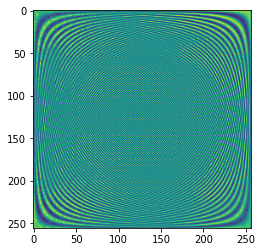

In [74]:
# DFT of image rotated by 90 degrees.
def get_DFT_mat(v, inverse=False):
    v_np = np.array(v)
    DFT_size = v.shape[1]
    DFT_mat = np.empty(shape=(DFT_size,DFT_size))
    conjugate = 1 if inverse==False else -1
    w = np.power(np.e, (conjugate*-2j)*np.pi/DFT_size, dtype=complex)
    for i in range(DFT_size):
        for j in range(DFT_size):
            DFT_mat[i,j] = np.power(w, i*j, dtype=complex)
    return (1/np.sqrt(DFT_size)) * DFT_mat * np.transpose(v_np)

orig_img = Image.open(r"./mandril_original.png").convert('L')
dist_img = Image.open(r"./mandril_distorted.png").convert('L')
A = get_DFT_mat(np.matrix(orig_img)) / 255.0
B = get_DFT_mat(np.matrix(dist_img)) / 255.0

plt.imshow(A)

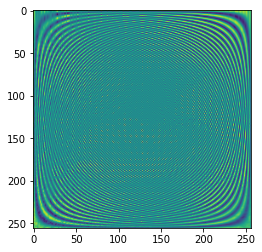

In [75]:
plt.imshow(B)

In [76]:
#since A's singular values are non-zero, it is of full rank.
u, s, vh = np.linalg.svd(A)
print(s)

[7.37883009e-01 7.34507999e-01 7.21063609e-01 7.12188876e-01
 7.04070618e-01 6.88598234e-01 6.75531037e-01 6.63082903e-01
 6.54668173e-01 6.42967573e-01 6.33528070e-01 6.29384904e-01
 6.21120496e-01 6.17907247e-01 6.14457318e-01 6.12476201e-01
 6.07492091e-01 6.05509852e-01 6.02604741e-01 6.00040069e-01
 5.98643723e-01 5.96886579e-01 5.96117740e-01 5.91733676e-01
 5.88983494e-01 5.87542464e-01 5.86717094e-01 5.84768896e-01
 5.82855329e-01 5.79617851e-01 5.75589015e-01 5.73297828e-01
 5.72502536e-01 5.69716479e-01 5.68517788e-01 5.66087133e-01
 5.65907062e-01 5.62415390e-01 5.61365491e-01 5.60281052e-01
 5.58210998e-01 5.56674497e-01 5.56238088e-01 5.54085054e-01
 5.52653684e-01 5.50367909e-01 5.49889636e-01 5.48730571e-01
 5.48465767e-01 5.47085732e-01 5.45988799e-01 5.42398562e-01
 5.39962503e-01 5.37949216e-01 5.37290415e-01 5.34652185e-01
 5.34299316e-01 5.33116270e-01 5.31781353e-01 5.28475489e-01
 5.27698771e-01 5.24325595e-01 5.22916832e-01 5.21256528e-01
 5.19194971e-01 5.180627

<ipython-input-74-ac80ee1d5ac5>:10: ComplexWarning: Casting complex values to real discards the imaginary part
  DFT_mat[i,j] = np.power(w, i*j, dtype=complex)


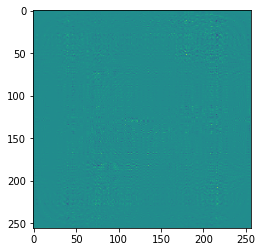

In [77]:
#least squares solution
C_inv = np.linalg.pinv(B) * A

reconst_img = get_DFT_mat(B * C_inv, inverse=True)
plt.imshow(B * C_inv)

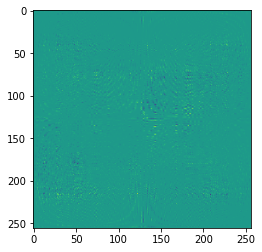

In [78]:
plt.imshow(reconst_img)